# User set :
Change `Direcotry`, `Fileindex` and `Filenamebase`

In [1]:
Diretory = '/Users/ranchu/ToDownload/Chimera_S25_100ms/Frozen_CB_X48E40_100km/'
Fileindex = 170
Filenamebase = 'deleptonizationwave_hdf5_chk_'
# prepare before call functions
fullfilename = Diretory + Filenamebase + '{:04d}'.format(Fileindex)
print(fullfilename)

/Users/ranchu/ToDownload/Chimera_S25_100ms/Frozen_CB_X48E40_100km/deleptonizationwave_hdf5_chk_0170


# Making plots ...
In order of EoS, Angular Moments, Luminosity, Energy Mean Parameters

<IPython.core.display.Javascript object>


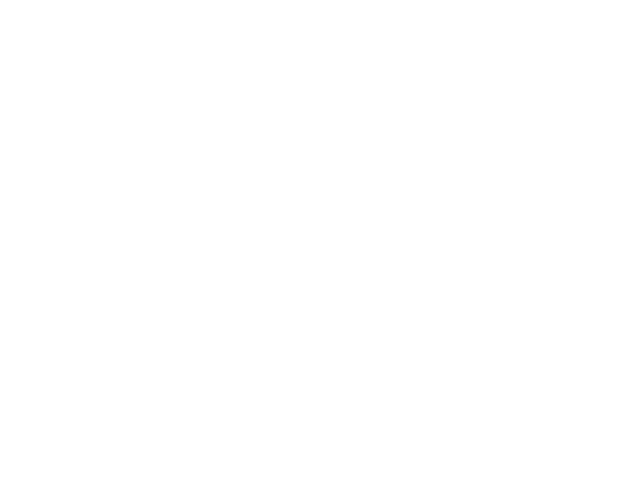

In [2]:
# libraries
%matplotlib notebook
import flashytlib.plot as fyplt
fyplt.plt_1D_Eos(fullfilename)

In [3]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np
[NumberDensity, EnergyDensity, AverageEnergy, ZerothMoment, ECenter, Radius] \
= fycal.ReadMoment_Zeroth(fullfilename)
[Luminosity, FirstMoment, ECenter_H, Radius] \
= fycal.ReadMoment_First(fullfilename)
AverageFluxFactor \
= np.true_divide(Luminosity,EnergyDensity)

In [4]:
#fyplt.plt_1D_Moments(ZerothMoment, FirstMoment)

<IPython.core.display.Javascript object>


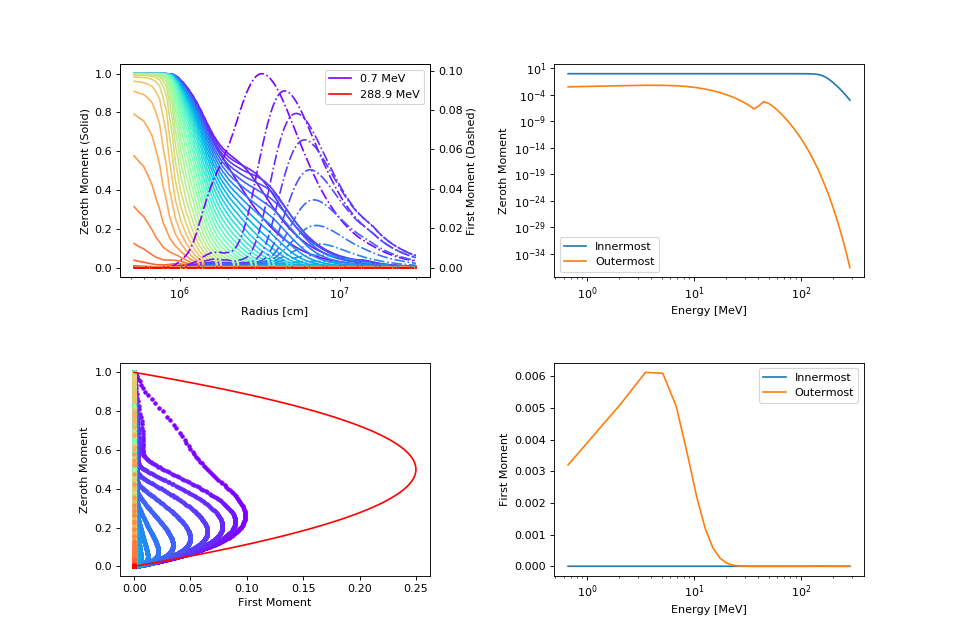

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = cm.rainbow(np.linspace(0, 1, len(ECenter)))
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# 
ax1 = fig.add_subplot(2,2,1)
for i in range(len(ECenter)):
    if ( i == 0 ):
        lns11 = ax1.plot(Radius,ZerothMoment[:,i],color=colors[i],label= '%.1f'%(ECenter[i])+' MeV')
    elif (i == len(ECenter)-1 ):
        lns12 = ax1.plot(Radius,ZerothMoment[:,i],color=colors[i],label= '%.1f'%(ECenter[i])+' MeV')
    else:
        ax1.plot(Radius,ZerothMoment[:,i],color=colors[i])
        
ax1.set_xscale('log')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Zeroth Moment (Solid)')
ax2 = ax1.twinx()
for i in range(len(ECenter)):
    ax2.plot(Radius,FirstMoment[:,i],'-.',color=colors[i])
ax2.set_ylabel('First Moment (Dashed)')
lns1 = lns11 + lns12
labs1 = [l.get_label() for l in lns1]
ax1.legend(lns1, labs1, loc='best')
# 
ax3 = fig.add_subplot(2,2,3)
for i in range(len(ECenter)):
    ax3.plot(FirstMoment[:,i],ZerothMoment[:,i],'.',color=colors[i])
yy = np.linspace(0, 1, 100)
xxP_FD = np.multiply(yy,1-yy)
ax3.plot(xxP_FD,yy,color='red')
#BryFirstMoment = np.multiply(ZerothMoment,1-ZerothMoment)
#MarkOuter = np.zeros(np.shape(ZerothMoment))
#MarkOuter = FirstMoment - BryFirstMoment
#if( np.sum(MarkOuter) > 0.0):
#    print('Error')
ax3.set_xlabel('First Moment')
ax3.set_ylabel('Zeroth Moment')
#
ax4 = fig.add_subplot(2,2,2)
lns41 = ax4.plot(ECenter,ZerothMoment[1,:],label='Innermost')
lns42 = ax4.plot(ECenter,ZerothMoment[len(Radius)-1,:],label='Outermost')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel('Energy [MeV]')
ax4.set_ylabel('Zeroth Moment')
lns4 = lns41 + lns42
labs4 = [l.get_label() for l in lns4]
ax4.legend(lns4, labs4, loc='best')
#
ax5 = fig.add_subplot(2,2,4)
lns51 = ax5.plot(ECenter,FirstMoment[1,:],label='Innermost')
lns52 = ax5.plot(ECenter,FirstMoment[len(Radius)-1,:],label='Outermost')
ax5.set_xscale('log')
ax5.set_yscale('linear')
ax5.set_xlabel('Energy [MeV]')
ax5.set_ylabel('First Moment')
lns5 = lns51 + lns52
labs5 = [l.get_label() for l in lns5]
ax5.legend(lns5, labs5, loc='best')
# adjust
    # ===== adjust ===== #
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.1,  # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.4,  # the amount of width reserved for space between subplots,
                    hspace = 0.4)  # the amount of height reserved for space between subplots
plt.show()

<IPython.core.display.Javascript object>


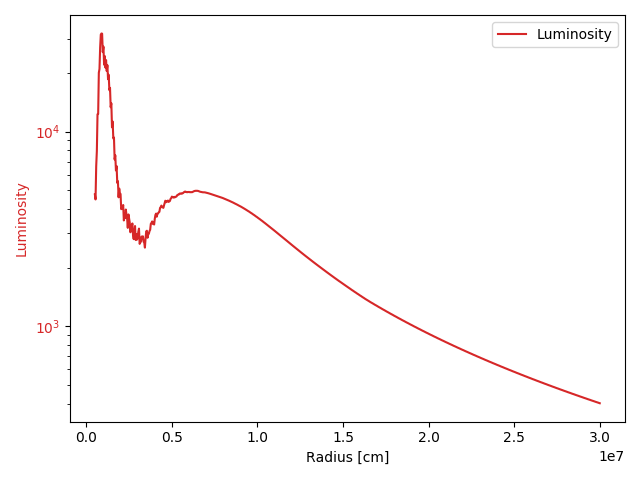

In [6]:
import matplotlib.pyplot as plt

#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots()
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Luminosity',color=color)
lns1 = ax1.plot(Radius,Luminosity,color=color,label='Luminosity')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
lns = lns1
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right')

plt.show()

<IPython.core.display.Javascript object>


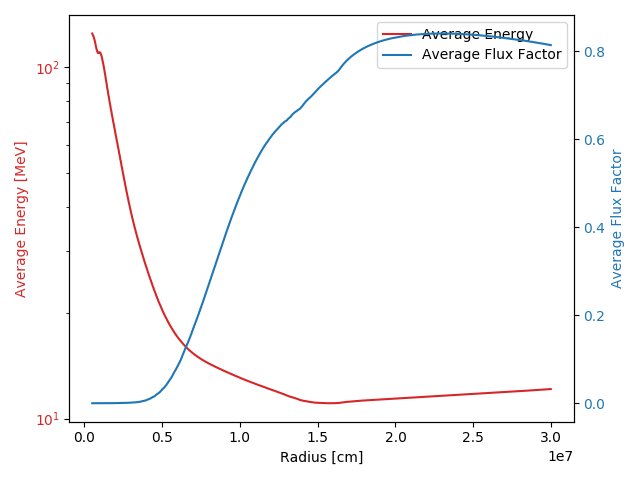

In [7]:
import matplotlib.pyplot as plt

#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots()
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]',color=color)
lns1 = ax1.plot(Radius,AverageEnergy,color=color,label='Average Energy')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Flux Factor', color=color)
leg = 'Average Flux Factor'
lns2 = ax2.plot(Radius, AverageFluxFactor, color=color,label=leg)
ax2.set_yscale('linear')
    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right')

plt.show()